In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta, datetime

In [2]:
data = pd.read_csv("CaseDetails (20).csv")
data.head()

,Policy_No,Claim_No,MemberName,AdmissionDate,DischargeDate,SubmissionDate,LastUpdatedDate,TAT,TreatmentType,Dept_Cd,...,Notes,IsTreatmentShared,Estimated_AdmissionDate,CaseManager,TC_Amount,Case_Referral,Case_Referral_Per,Mobile_No,Mobile_Other,LandLine_No
0,I038-000-112506218-01,NGI202103433,Mr. Bilal Muhammad Shakir,NaN,NaN,16/03/21,16/03/21 22:55,1,IPD,D025,...,"Dear Team, Kindly confirm if DB can be arrange...",Not Shared,NaN,Dr. Kirti Sharma,0.0,NaN,0,0.000000e+00,NaN,NaN
1,48155014185760302,ERN202103423,Mr. Andrew Joshua Povaz Ajitha,NaN,NaN,15/03/21,15/03/21 10:45,2,IPD,D031,...,Cost estimates for bone marrow transplant have...,Shared,NaN,Dr. Kirti Sharma,0.0,NaN,0,0.000000e+00,NaN,NaN
2,OIG/ME-86179/S/9274714,OI202103424,Mrs. Merene Thomas,NaN,NaN,15/03/21,15/03/21 10:49,2,IPD,D017,...,Kindly note that we have spoken to member’s fa...,Not Shared,NaN,Dr. Aastha Diwan,0.0,NaN,0,0.000000e+00,NaN,NaN
3,727113,MSH202103425,Mrs. Nazia Sadaf Aadil,NaN,NaN,15/03/21,15/03/21 10:50,2,IPD,D017,...,Baby of member is admitted in the NICU and is ...,Not Shared,NaN,Dr. ADITI,0.0,NaN,0,3.109800e+09,NaN,NaN
4,OIG/ME-85978/E/9268366,OI202103426,Ms. Anil Bhaskaran Nair,NaN,NaN,15/03/21,15/03/21 10:57,2,IPD,D006,...,Kindly note that the provided contact details ...,Not Shared,NaN,Dr. Rashmi Jaiswal,0.0,NaN,0,9.528031e+09,+971505794063,NaN


In [3]:
data.columns

Index(['Policy_No', 'Claim_No', 'MemberName', 'AdmissionDate', 'DischargeDate',
       'SubmissionDate', 'LastUpdatedDate', 'TAT', 'TreatmentType', 'Dept_Cd',
       'Dept_Nm', 'Diagnosis', 'Treatment', 'ExpectedTreatment_Cost',
       'Case_Bill_Amt', 'Bill_Converted_Amt', 'Bill_Currency_Cd',
       'Investigation_Cost', 'Approved_Amt', 'Service_Amt', 'Invoice_Amount',
       'Convert_Approved_Amt', 'Convert_Service_Amt', 'Convert_Invoice_Amount',
       'Convert_Currency_Cd', 'GOP_No', 'GOP_Generate_Dt', 'CaseStatus',
       'StatusCode', 'NoteStatusDate', 'Insurer_Cd', 'Insurer_Nm', 'Prv_Cd',
       'Prv_Nm', 'Prv_Location', 'Location', 'City', 'Country_Name',
       'Invoice_No', 'Invoice_Dt', 'CreateUser', 'Notes', 'IsTreatmentShared',
       'Estimated_AdmissionDate', 'CaseManager', 'TC_Amount', 'Case_Referral',
       'Case_Referral_Per', 'Mobile_No', 'Mobile_Other', 'LandLine_No'],
      dtype='object')

In [4]:
data.shape

(2881, 51)

In [5]:
data.isnull().sum()

Policy_No                  1008
Claim_No                      0
MemberName                    0
AdmissionDate              1407
DischargeDate              1408
SubmissionDate                0
LastUpdatedDate               0
TAT                           0
TreatmentType                62
Dept_Cd                     541
Dept_Nm                     541
Diagnosis                   112
Treatment                   250
ExpectedTreatment_Cost        0
Case_Bill_Amt                 0
Bill_Converted_Amt            0
Bill_Currency_Cd           1593
Investigation_Cost            0
Approved_Amt                  0
Service_Amt                   0
Invoice_Amount                0
Convert_Approved_Amt          0
Convert_Service_Amt           0
Convert_Invoice_Amount        0
Convert_Currency_Cd        1594
GOP_No                     1170
GOP_Generate_Dt            1170
CaseStatus                    0
StatusCode                    0
NoteStatusDate                3
Insurer_Cd                    0
Insurer_

In [6]:
df = data[['SubmissionDate','Dept_Nm','Diagnosis','Invoice_Amount','Insurer_Nm','Country_Name']]

In [7]:
df

,SubmissionDate,Dept_Nm,Diagnosis,Invoice_Amount,Insurer_Nm,Country_Name
0,16/03/21,Nephrology,N20.2 Calculus of kidney with calculus of ureter,0.0,National General Insurance Company,NaN
1,15/03/21,Orthopaedics,Blood Disorder/ Cancer,0.0,E-Neuron,NaN
2,15/03/21,Gynaecology,Maternity,0.0,Oman Insurance,NaN
3,15/03/21,Gynaecology,Maternity,0.0,MSH International Insurance,NaN
4,15/03/21,Cardiology,Acute Inferior STEMI,0.0,Oman Insurance,NaN
...,...,...,...,...,...,...
2876,21/11/17,Proctology,Furuncle on the buttocks,0.0,Smile Services Ltd,NaN
2877,15/11/17,Ophthalmology,Cataract,0.0,Dubai Insurance,NaN
2878,08/11/17,Orthopaedics,Knee injury,453697.7,Amity Insurance,BANGLADESH
2879,29/10/17,Gynaecology,Delivery,199758.0,Kazakhstan Embassy CHP,INDIA


In [8]:
df.dtypes

SubmissionDate     object
Dept_Nm            object
Diagnosis          object
Invoice_Amount    float64
Insurer_Nm         object
Country_Name       object
dtype: object

In [9]:
df.isnull().sum()

SubmissionDate       0
Dept_Nm            541
Diagnosis          112
Invoice_Amount       0
Insurer_Nm           0
Country_Name      1154
dtype: int64

In [10]:
df.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df.shape

(1430, 6)

In [12]:
df.nunique()#  we can see this  nunique value in each column

SubmissionDate     555
Dept_Nm             37
Diagnosis          813
Invoice_Amount    1159
Insurer_Nm          35
Country_Name        19
dtype: int64

In [13]:
df['SubmissionDate'] = pd.to_datetime(df['SubmissionDate'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df.dtypes

SubmissionDate    datetime64[ns]
Dept_Nm                   object
Diagnosis                 object
Invoice_Amount           float64
Insurer_Nm                object
Country_Name              object
dtype: object

In [15]:
df['month_year'] = pd.to_datetime(df['SubmissionDate']).dt.to_period('M')
df["Year"] = pd.DatetimeIndex(df['SubmissionDate']).year

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df.reset_index(inplace=True)

In [17]:
df.drop(['index'],axis=1,inplace=True)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SubmissionDate,Dept_Nm,Diagnosis,Invoice_Amount,Insurer_Nm,Country_Name,month_year,Year
0,2021-03-15,Ophthalmology,Cataract,0.0,MSH International Insurance,INDIA,2021-03,2021
1,2021-03-13,Cardiology,Chest Pain,0.0,Health360,INDIA,2021-03,2021
2,2021-10-03,Hepatology,Steatohepatitis,0.0,Union Insurance,INDIA,2021-10,2021
3,2021-09-03,Gynaecology,Pre-Natal Care,0.0,Health360,UNITED STATES OF AMERICA,2021-09,2021
4,2021-08-03,Ophthalmology,cataract,0.0,Oman Insurance,INDIA,2021-08,2021


In [18]:
df.nunique()

SubmissionDate     555
Dept_Nm             37
Diagnosis          813
Invoice_Amount    1159
Insurer_Nm          35
Country_Name        19
month_year          53
Year                 5
dtype: int64

In [75]:
temp = pd.DataFrame((df.groupby(['Insurer_Nm','Country_Name','Year']).Invoice_Amount.agg([np.mean])).reset_index())
temp

,Insurer_Nm,Country_Name,Year,mean
0,ASCANA Insurance,PHILIPPINES,2018,0.000000
1,Aafiya,INDIA,2019,145386.961667
2,Aafiya,INDIA,2020,138705.000000
3,Aafiya,INDIA,2021,120347.354286
4,Aafiya,NEPAL,2020,227705.460000
...,...,...,...,...
194,Whealth TMMC,PAKISTAN,2019,59070.088571
195,Whealth TMMC,PHILIPPINES,2019,68474.882000
196,Whealth TMMC,SRI LANKA,2019,123180.310000
197,eExpedise Referral,INDIA,2018,447553.500000


In [20]:
temp.nunique()

Insurer_Nm       35
Country_Name     19
Year              5
mean            173
dtype: int64

In [21]:
arr = temp['Insurer_Nm'].unique()

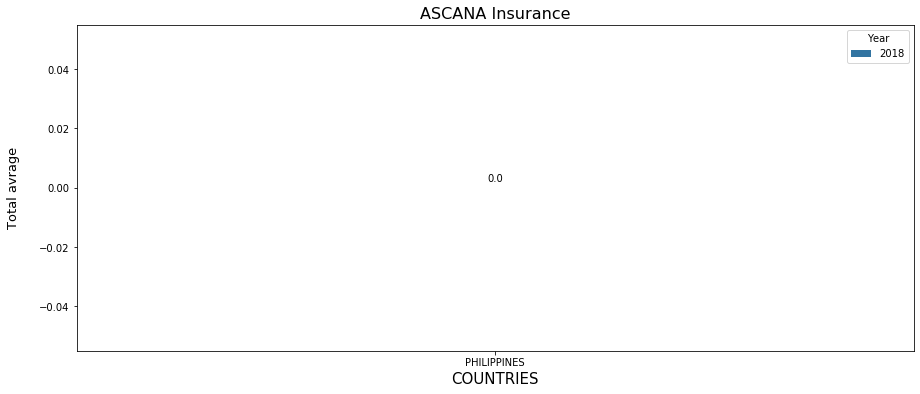

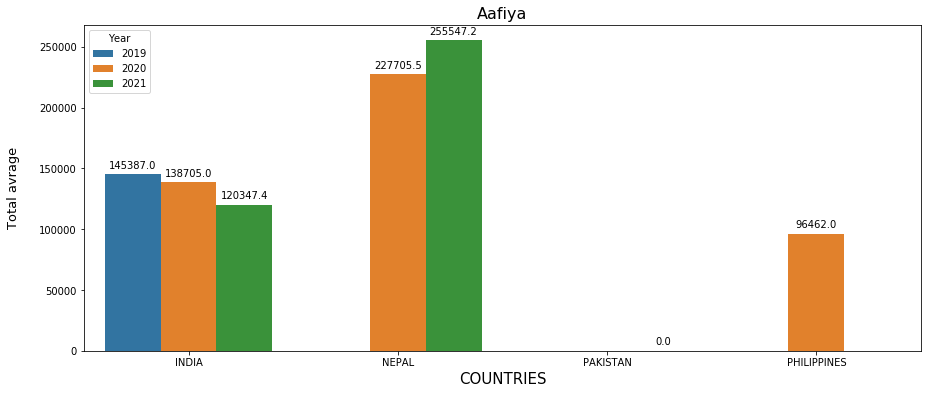

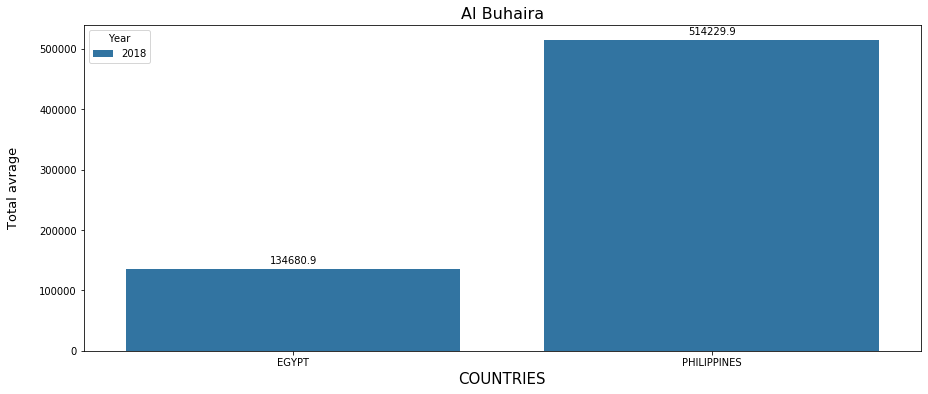

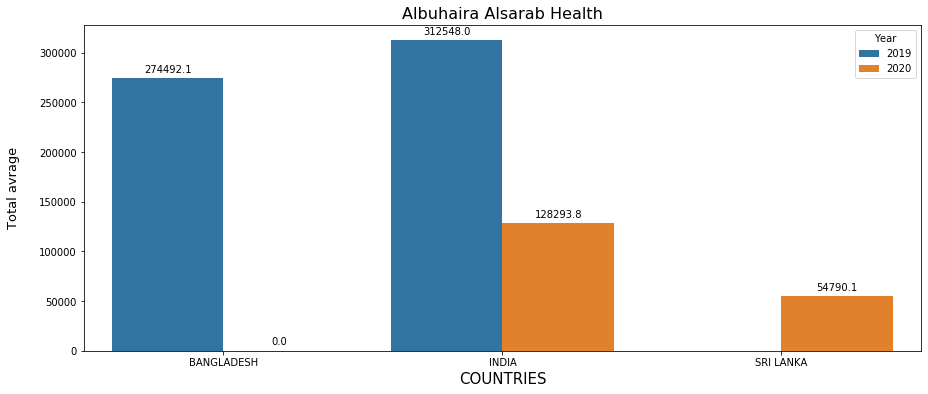

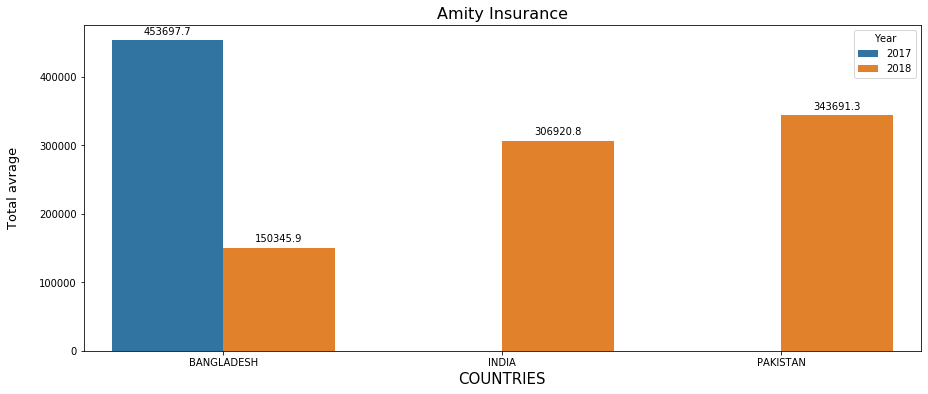

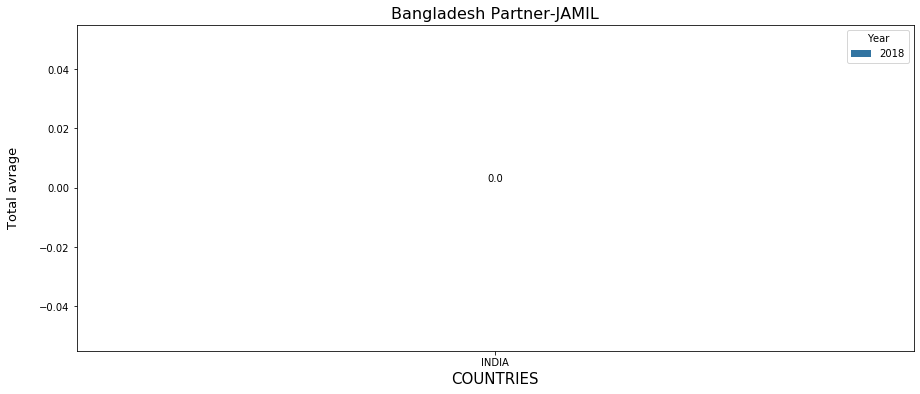

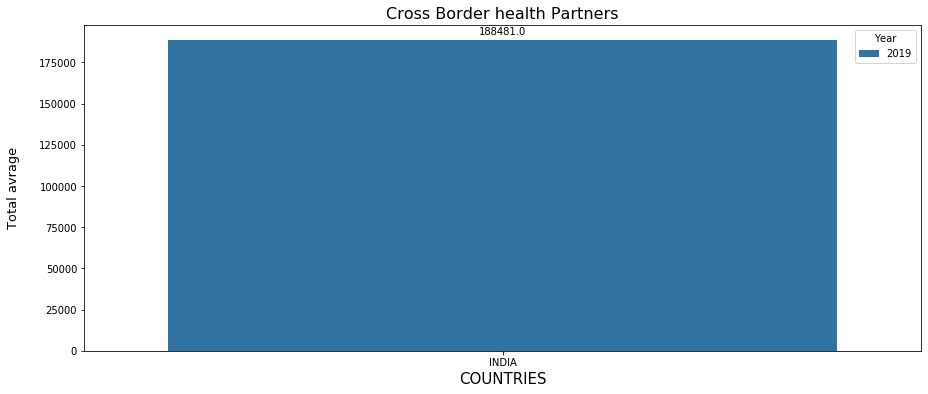

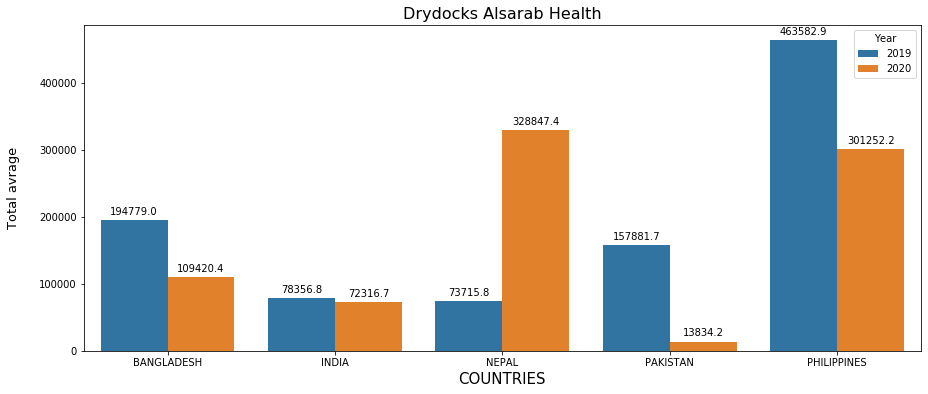

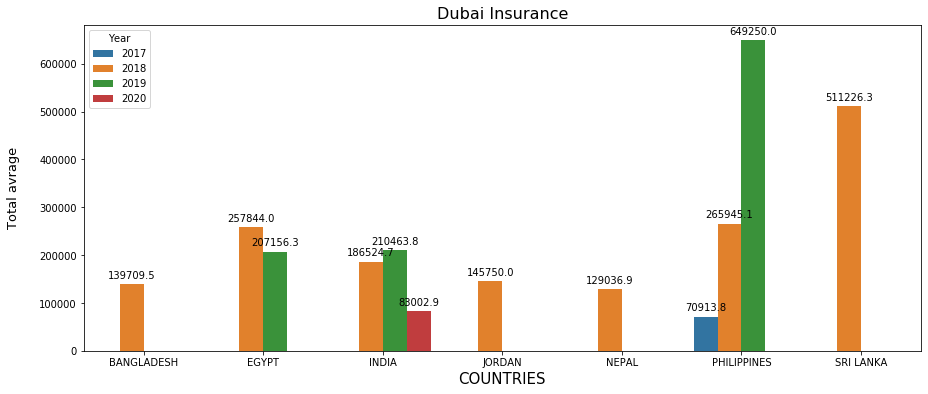

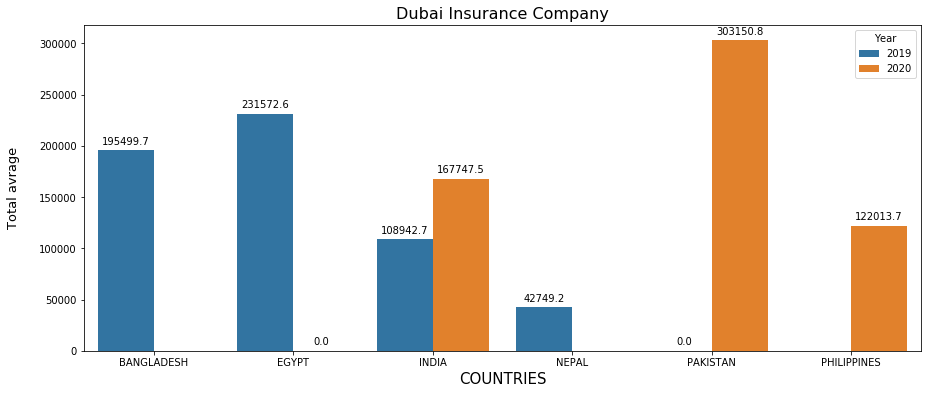

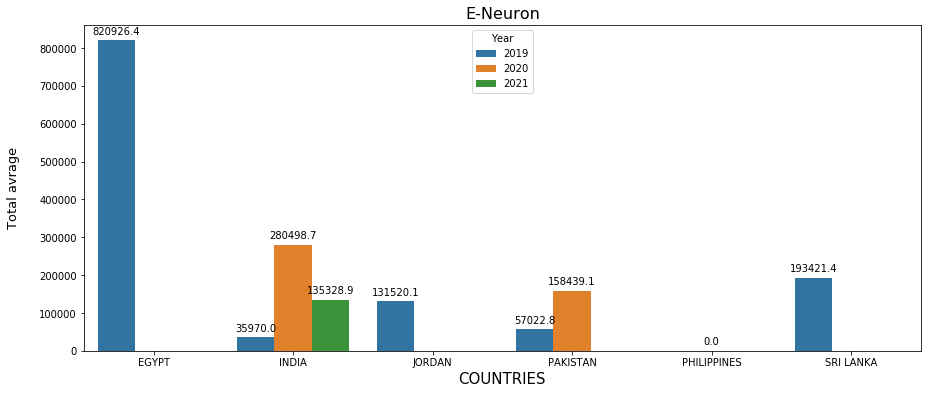

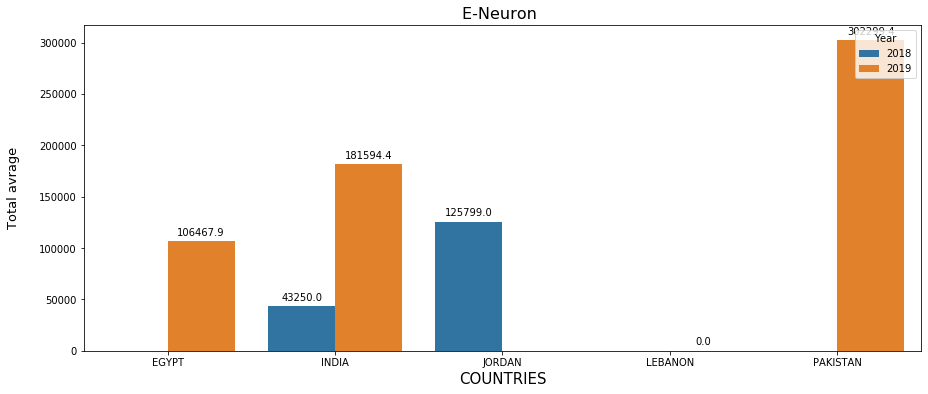

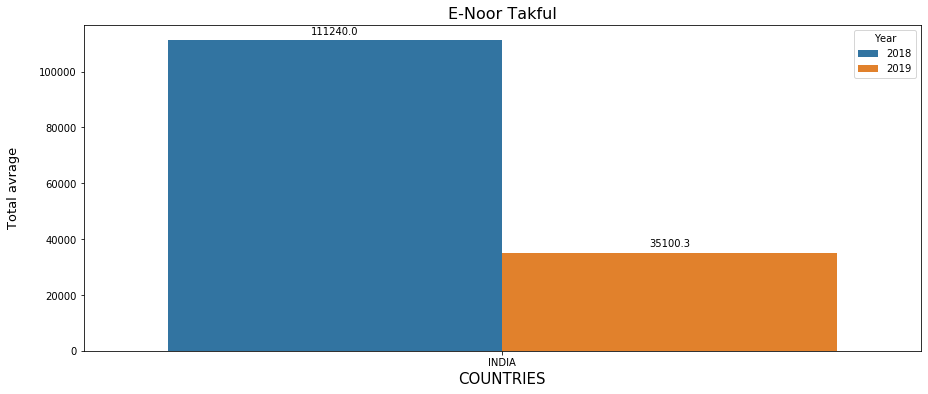

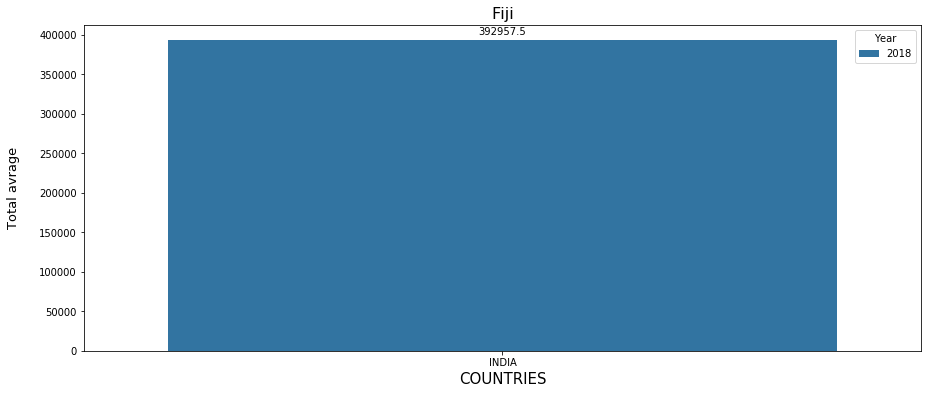

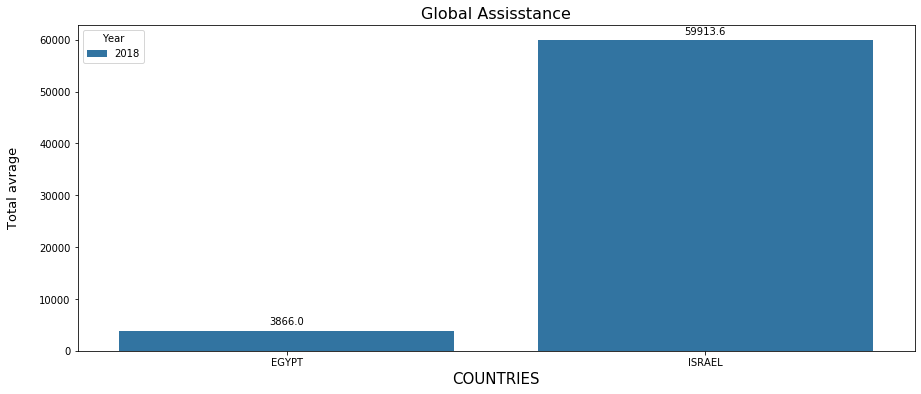

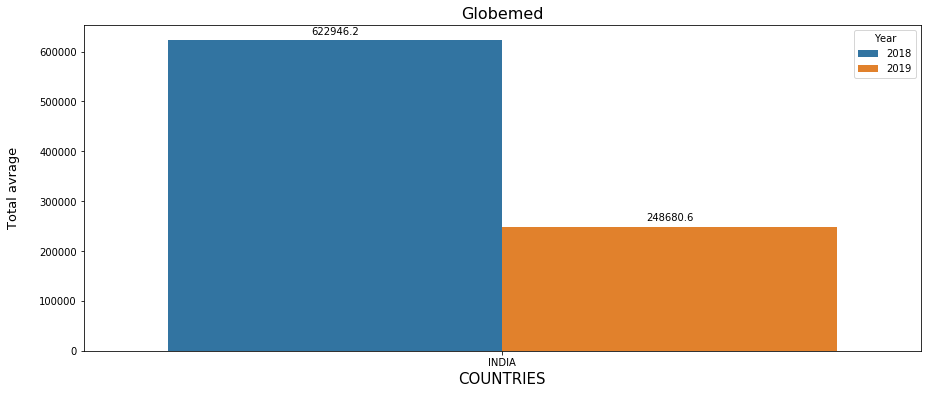

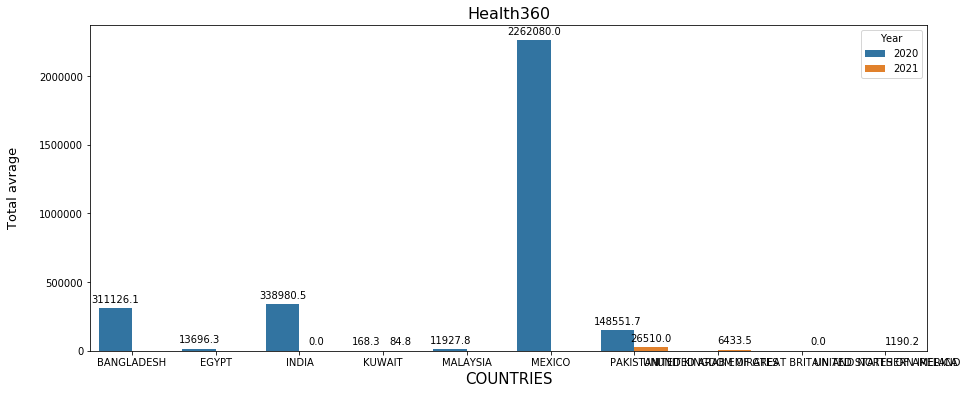

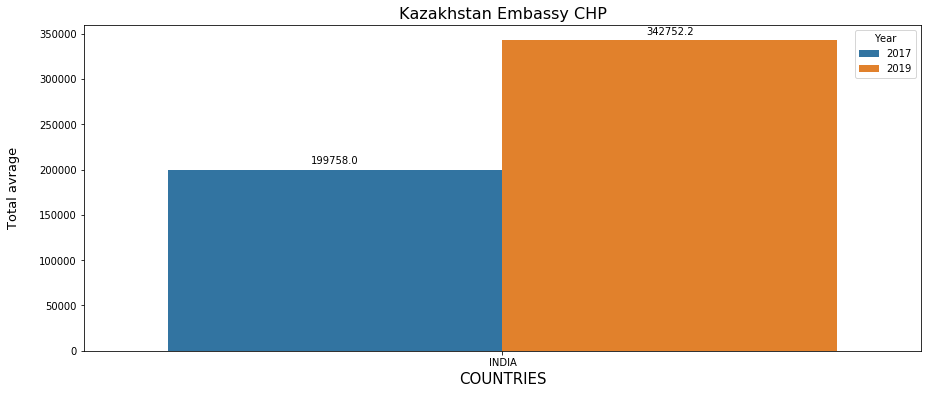

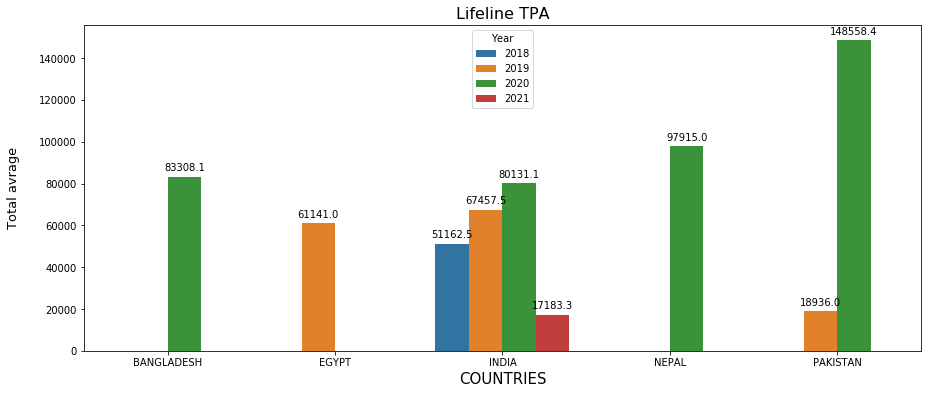

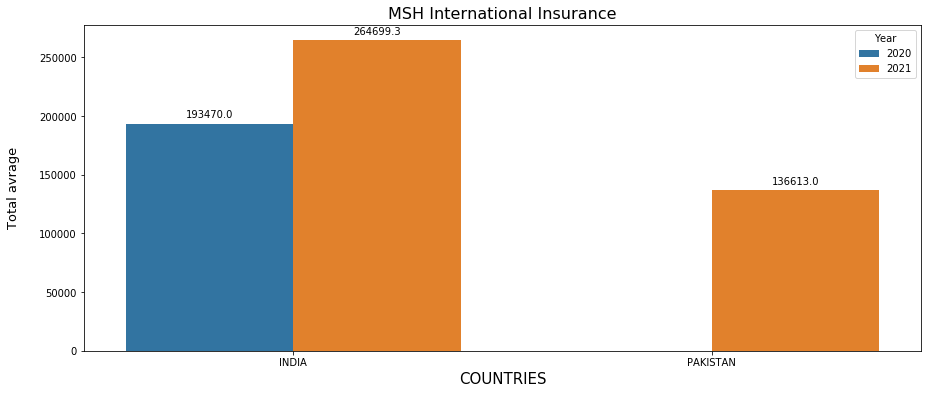

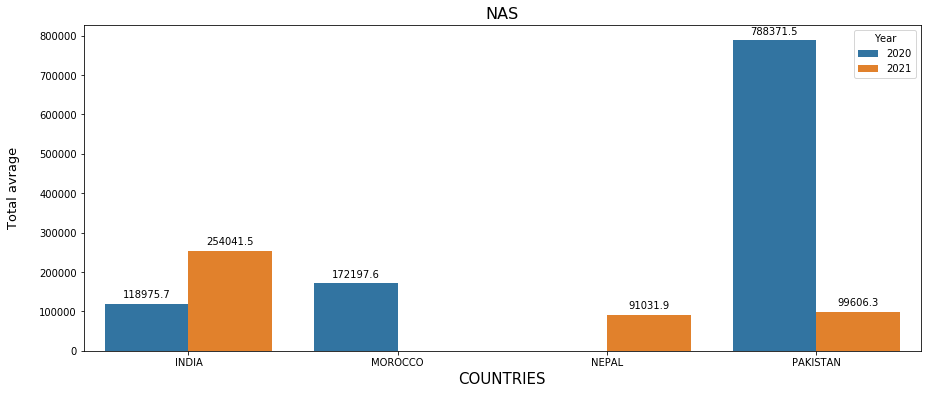

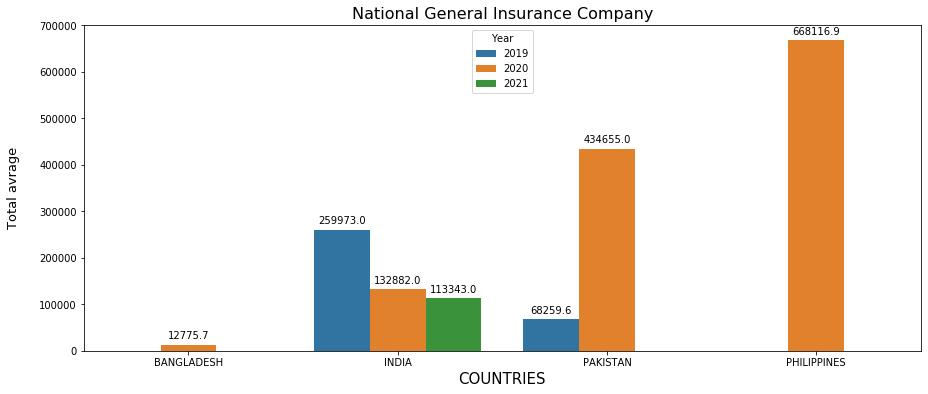

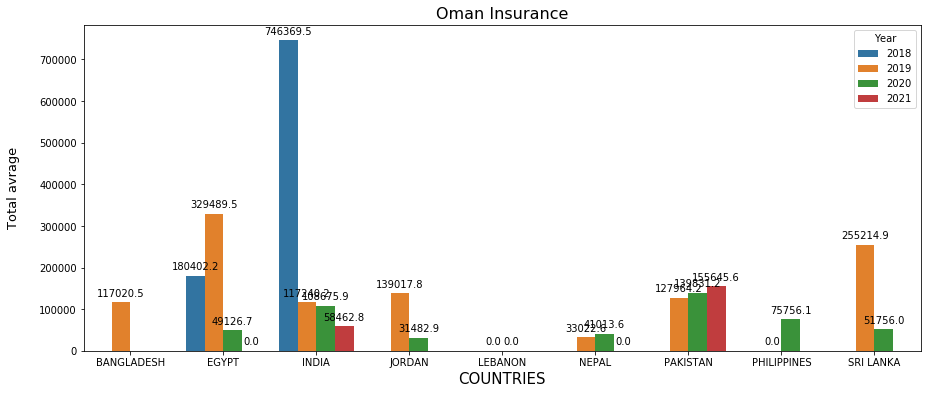

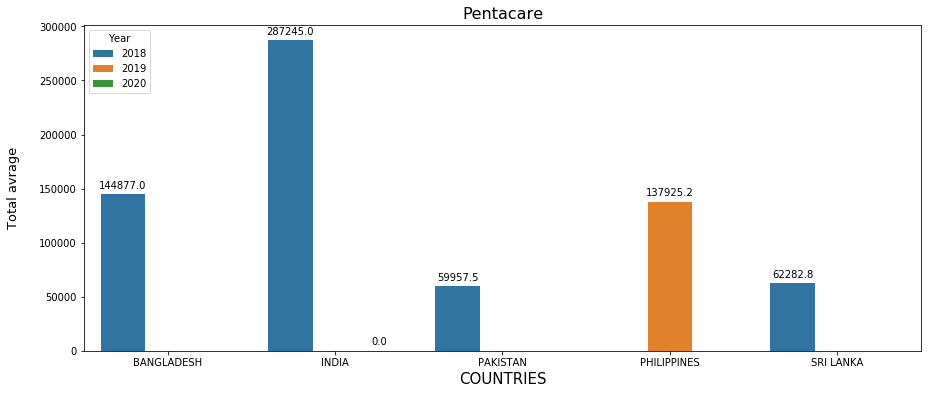

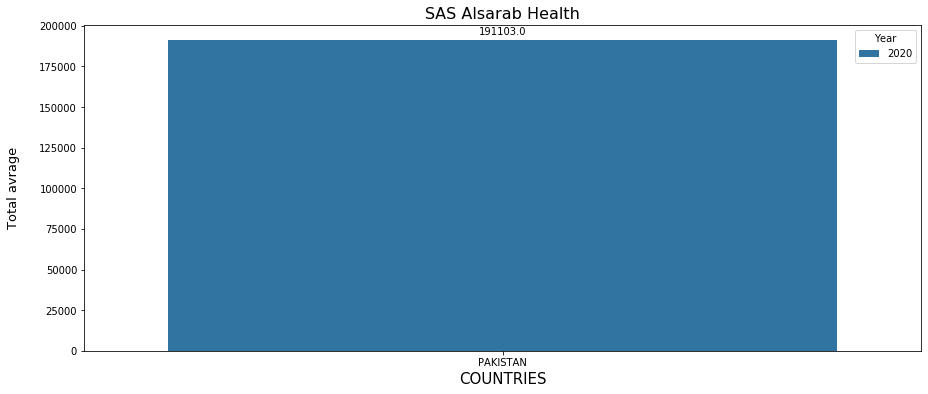

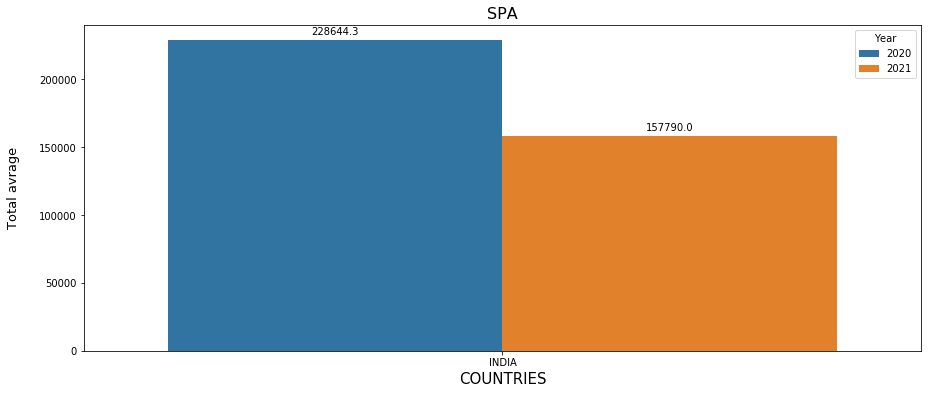

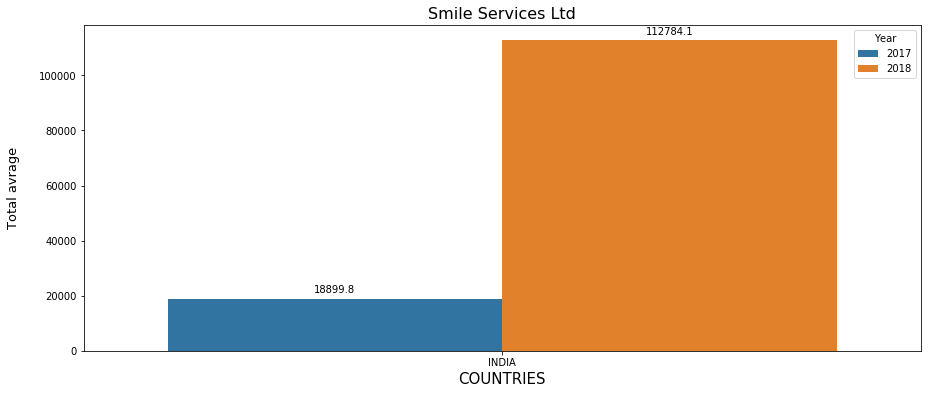

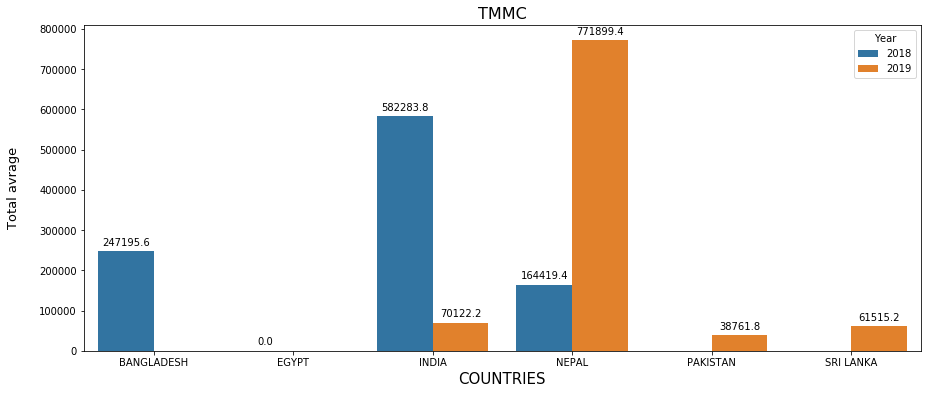

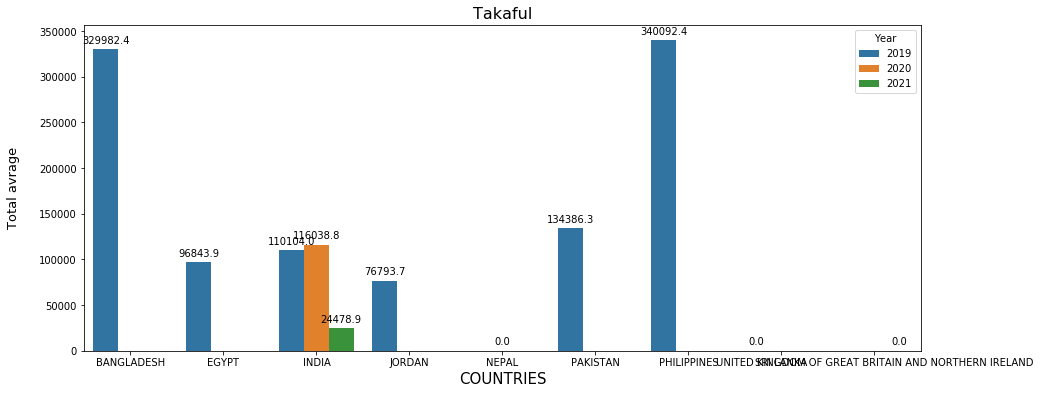

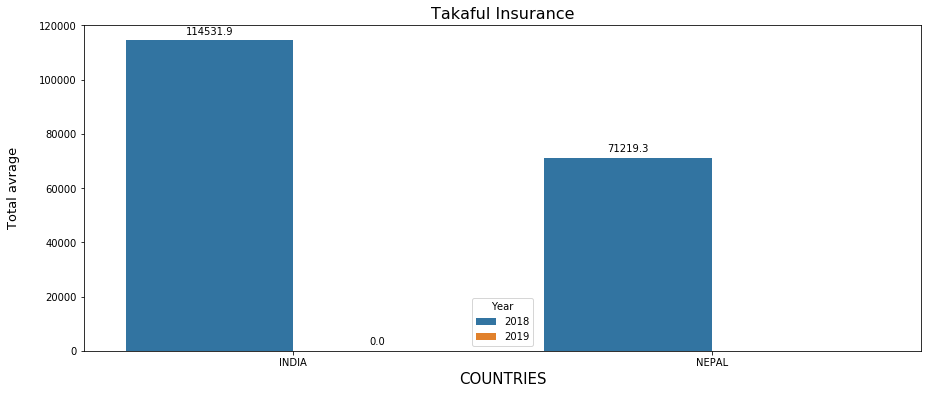

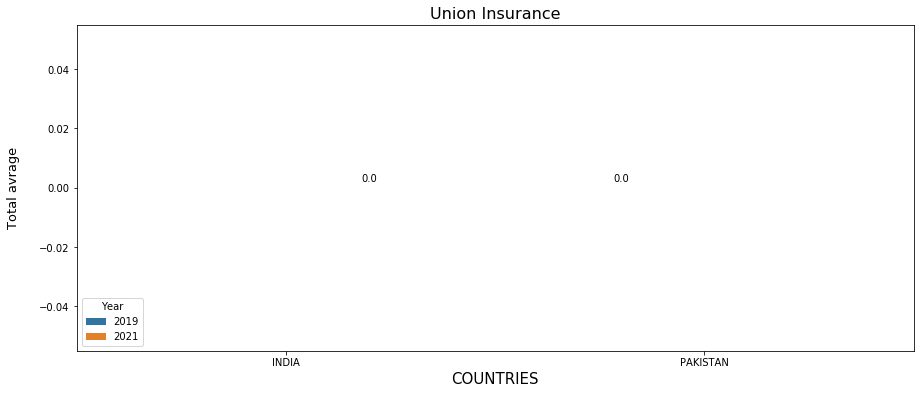

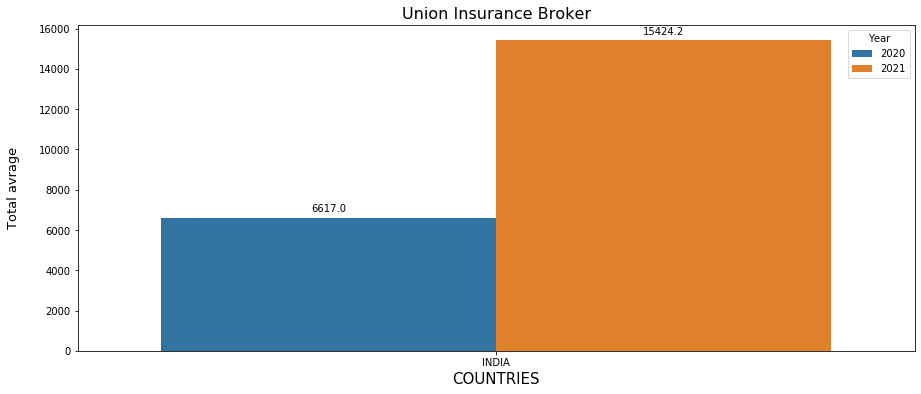

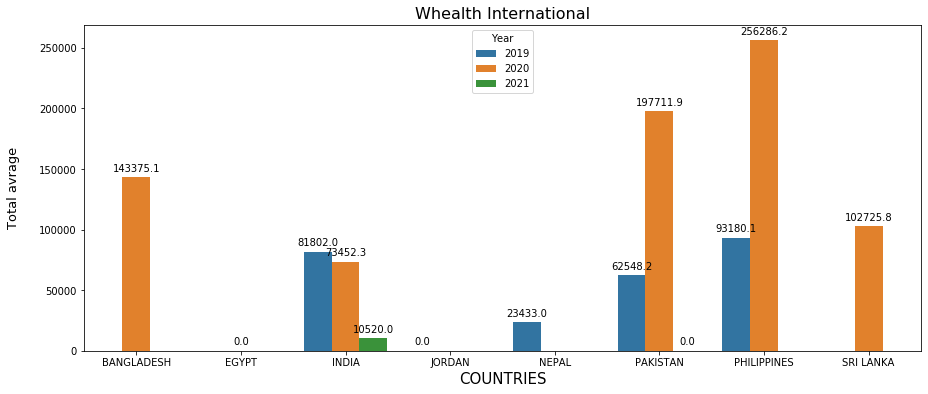

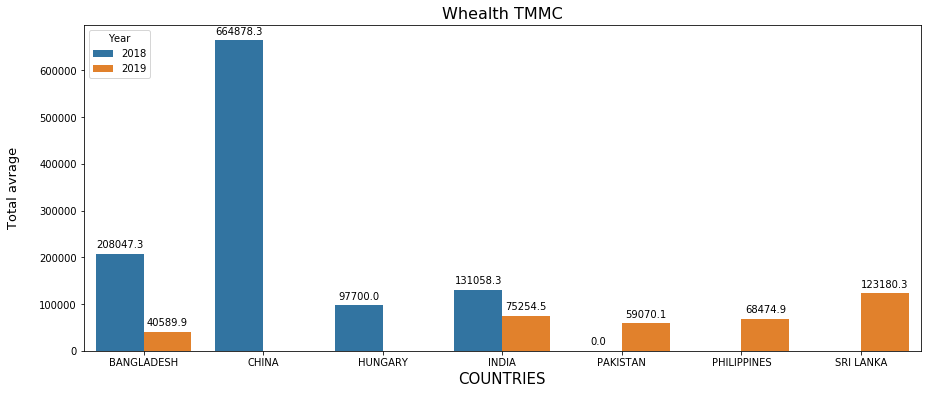

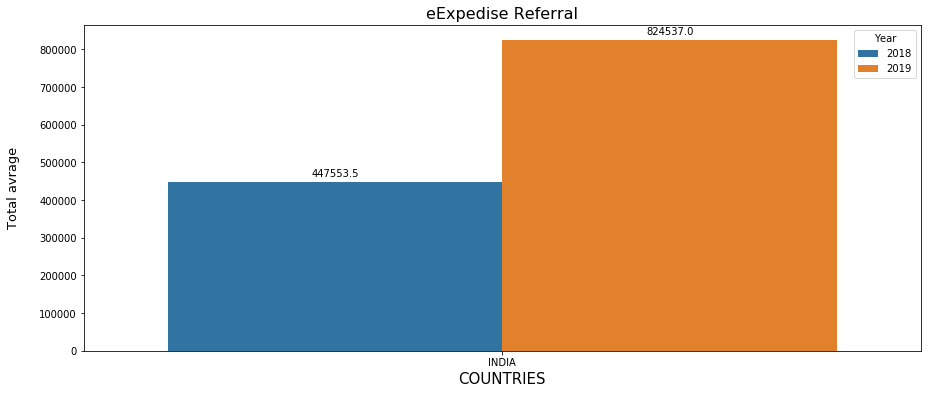

In [22]:
for i in arr:
    temp1 = temp[temp['Insurer_Nm']==i]
    plt.figure(figsize=(15,6))
    ax = sns.barplot(x='Country_Name', y='mean',hue='Year', data=temp1 )
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    ax.set_xlabel('COUNTRIES',size=15)
    ax.set_ylabel('Total avrage\n', size=13)
    plt.title(i, size=16) 
    plt.show()

In [33]:
import pymysql

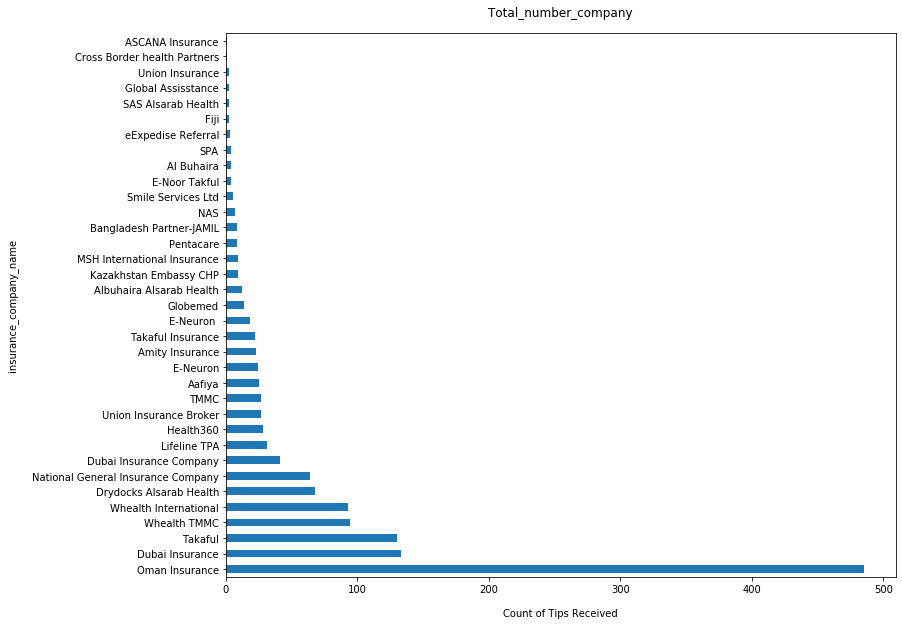

In [60]:
df['Insurer_Nm'].value_counts().plot(kind='barh', figsize=(12, 10))
plt.xlabel("Count of Tips Received", labelpad=14)
plt.ylabel("insurance_company_name", labelpad=14)
plt.title("Total_number_company", y=1.02);

In [66]:

# transforming the dataset for barplot 
data_df = df.groupby(['Insurer_Nm', 'Country_Name','month_year']).agg( 
    total_avrage=('Invoice_Amount', 'mean'), count=('Insurer_Nm', 'count')) 
  
data_df = data_df.reset_index() 
print(data_df.head()) 

         Insurer_Nm Country_Name month_year  total_avrage  count
0  ASCANA Insurance  PHILIPPINES    2018-12          0.00      1
1            Aafiya        INDIA    2019-03      38490.00      1
2            Aafiya        INDIA    2019-09      52576.02      1
3            Aafiya        INDIA    2019-10     132223.00      1
4            Aafiya        INDIA    2019-11      74274.85      2


In [101]:
data_df.head(15)

,Insurer_Nm,Country_Name,month_year,total_avrage,count
0,ASCANA Insurance,PHILIPPINES,2018-12,0.000000,1
1,Aafiya,INDIA,2019-03,38490.000000,1
2,Aafiya,INDIA,2019-09,52576.020000,1
3,Aafiya,INDIA,2019-10,132223.000000,1
4,Aafiya,INDIA,2019-11,74274.850000,2
5,Aafiya,INDIA,2019-12,500483.050000,1
6,Aafiya,INDIA,2020-02,67935.000000,1
7,Aafiya,INDIA,2020-03,0.000000,1
8,Aafiya,INDIA,2020-04,0.000000,1
9,Aafiya,INDIA,2020-06,110767.000000,1


In [76]:
cunt=temp['Insurer_Nm'].unique()

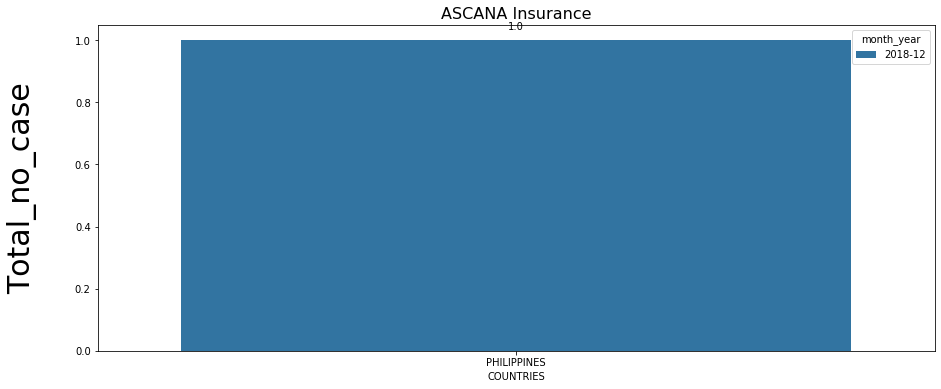

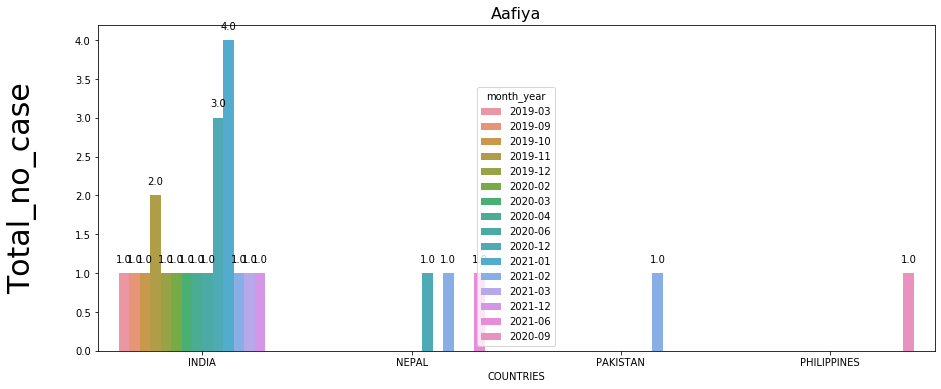

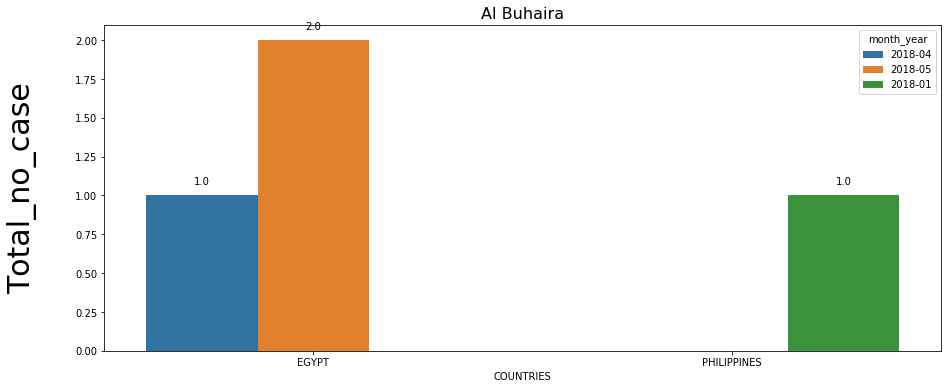

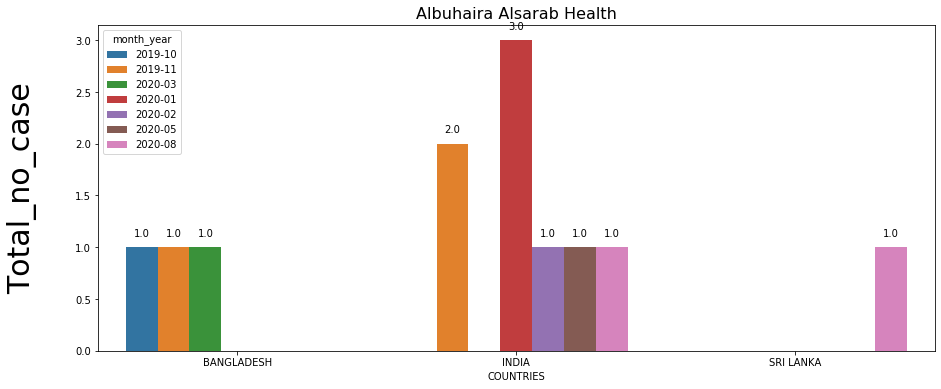

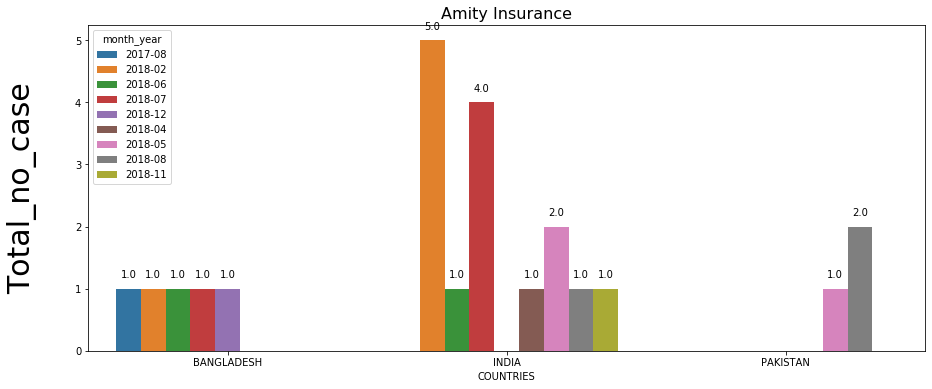

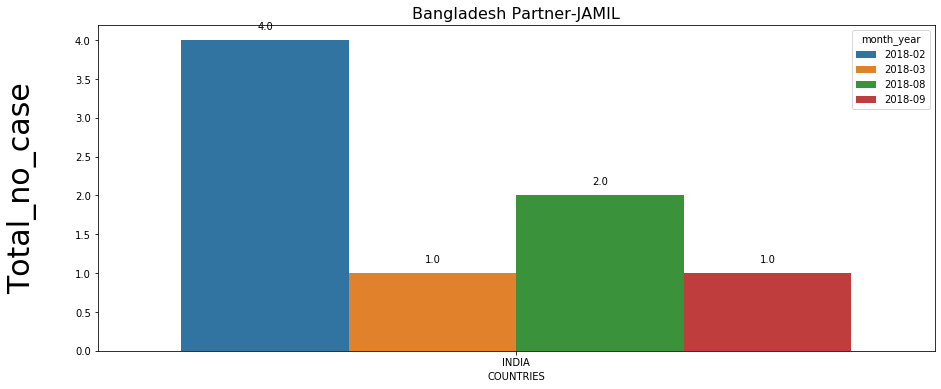

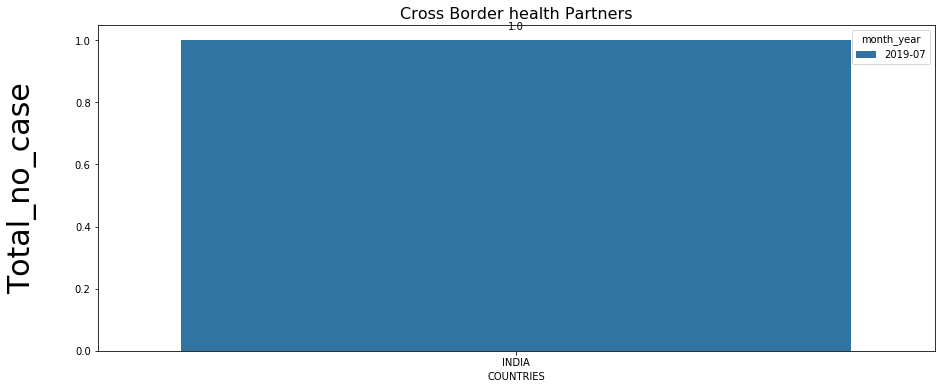

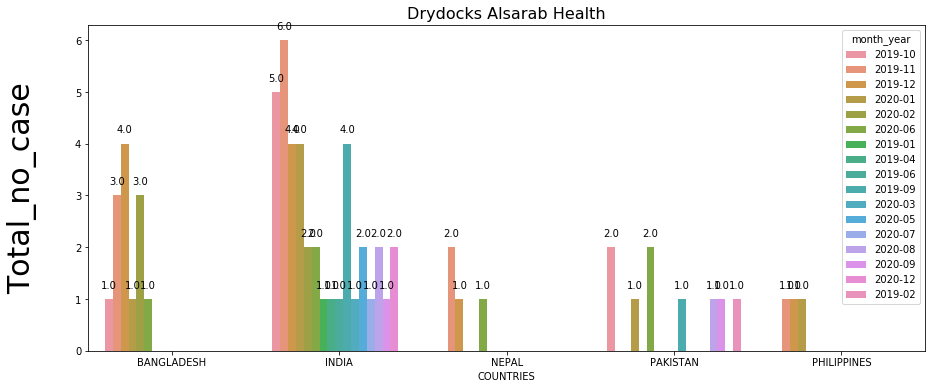

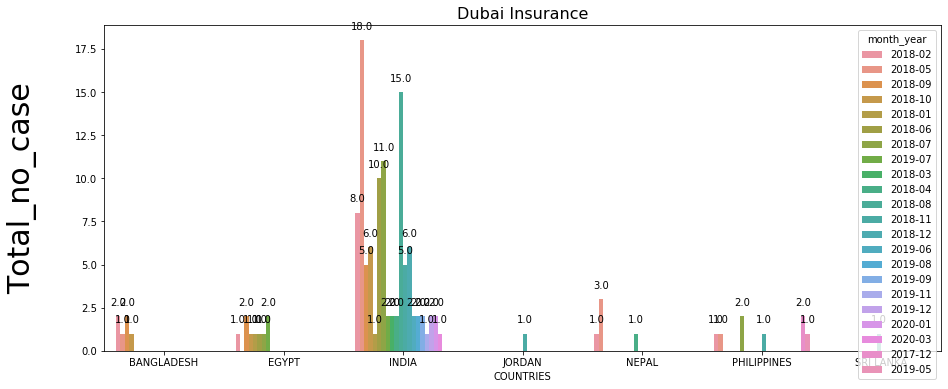

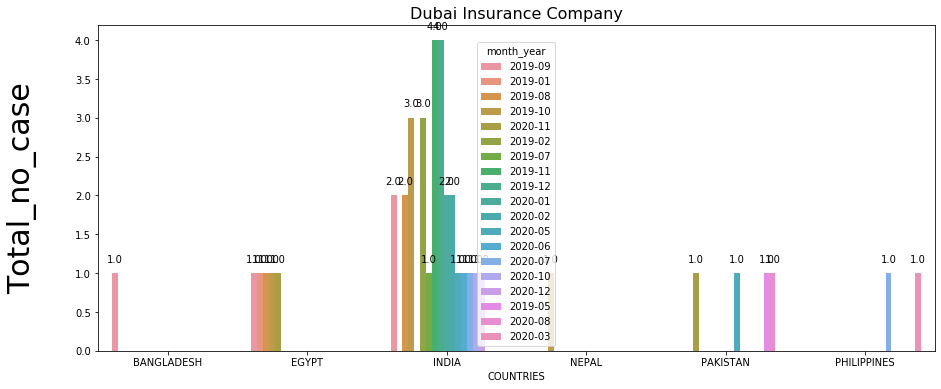

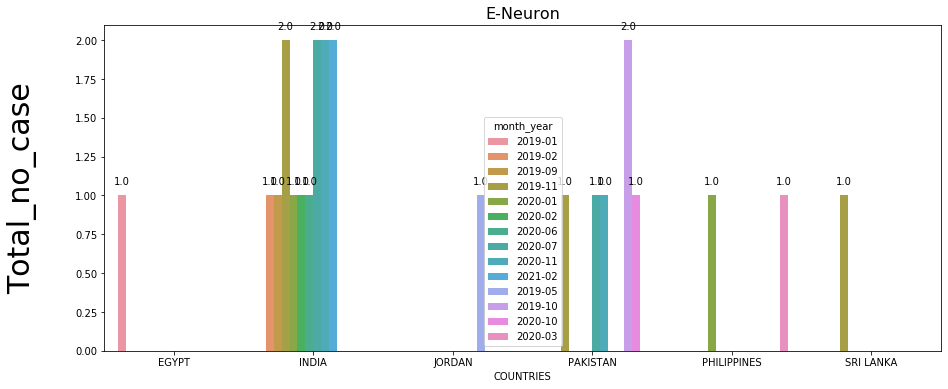

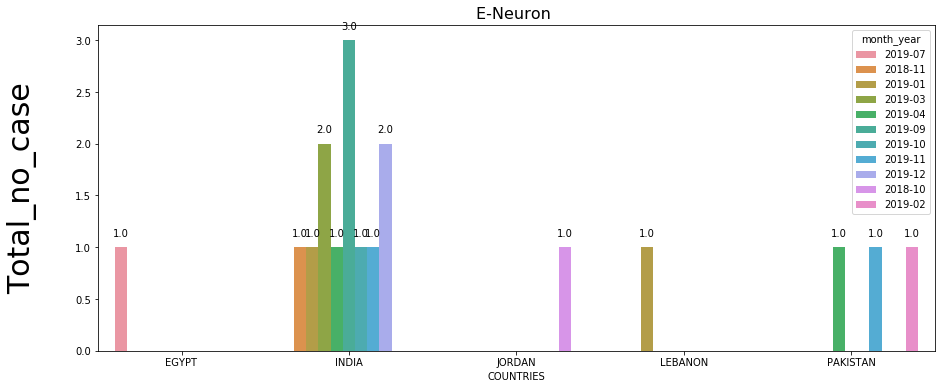

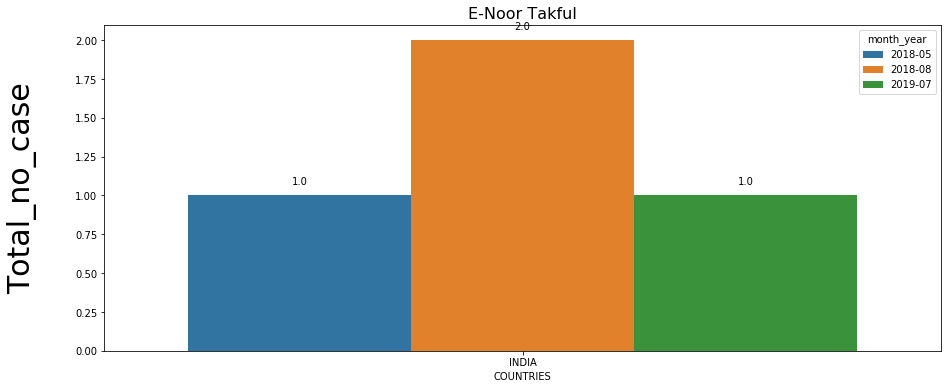

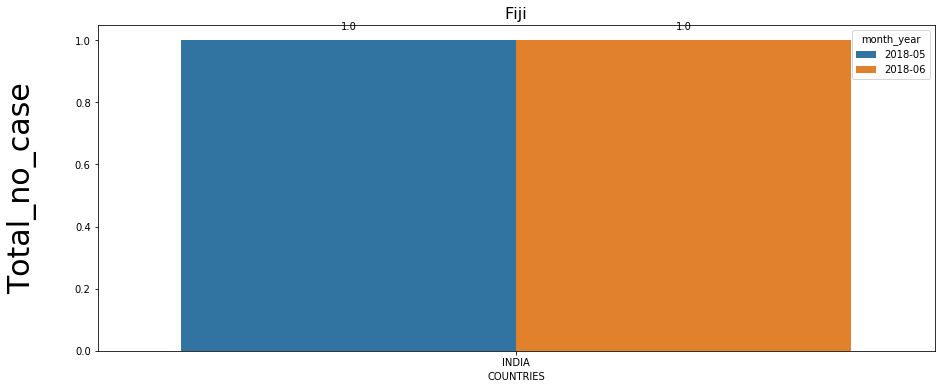

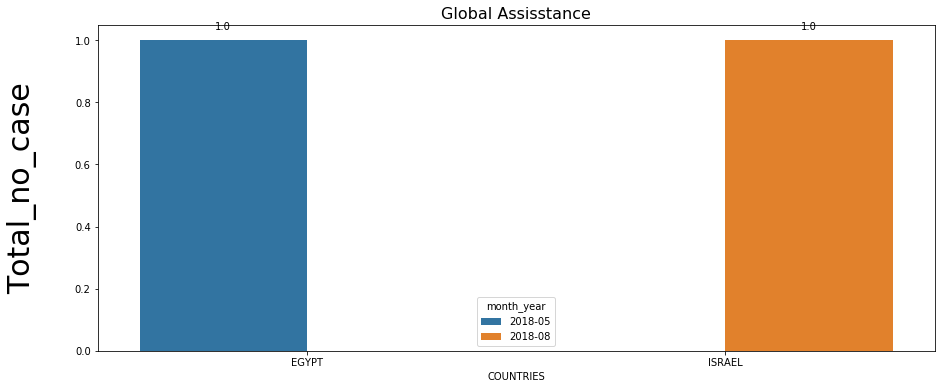

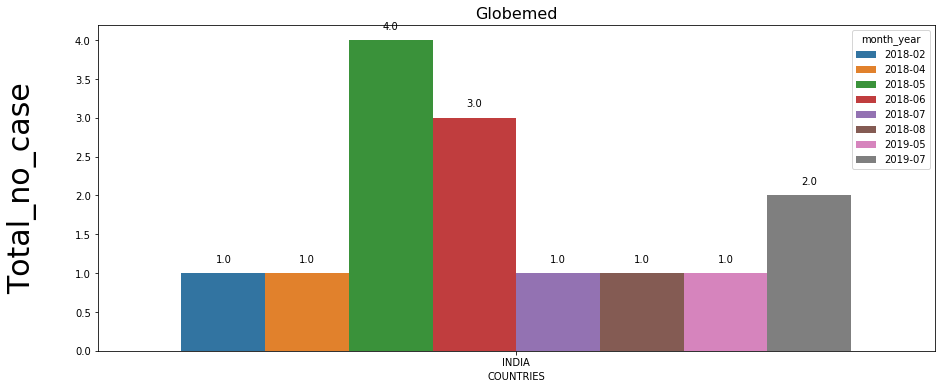

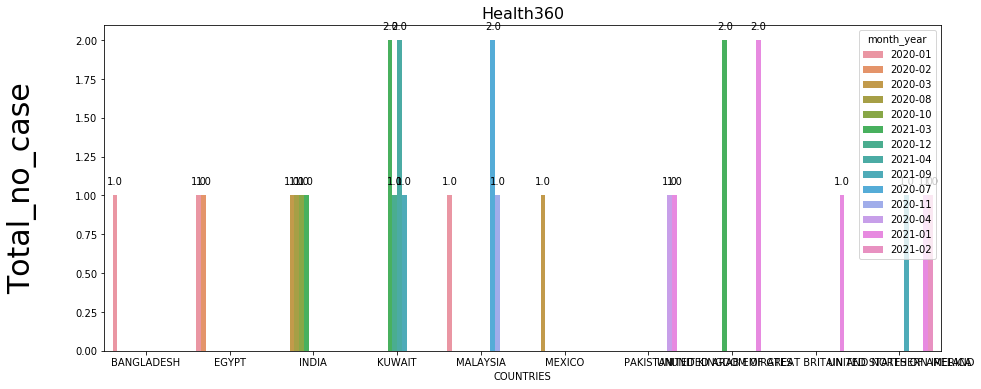

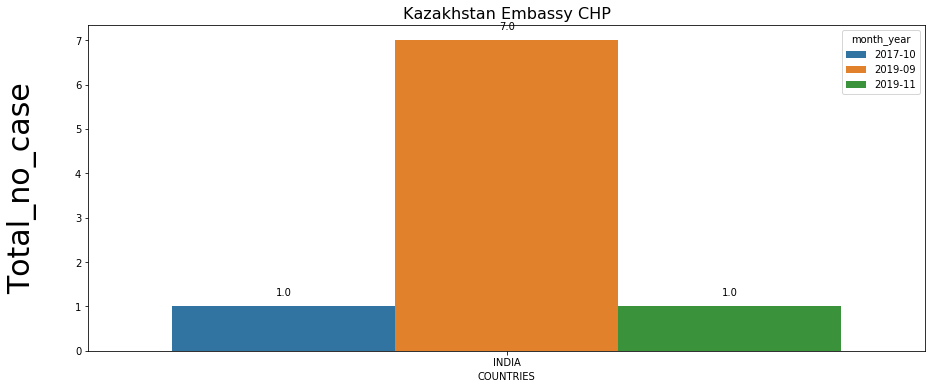

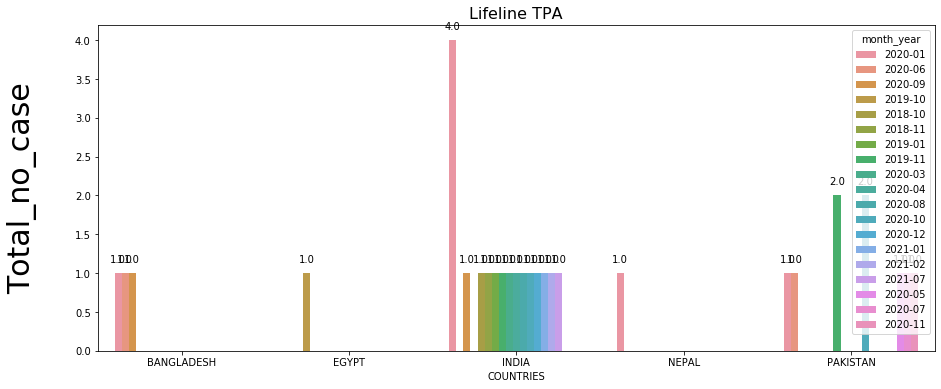

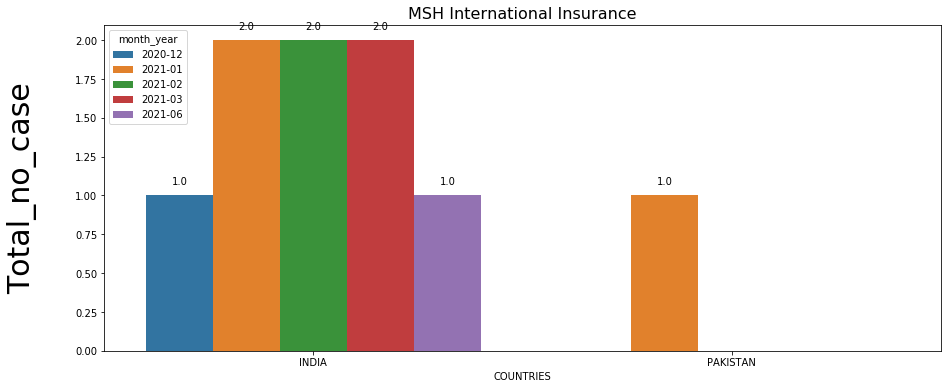

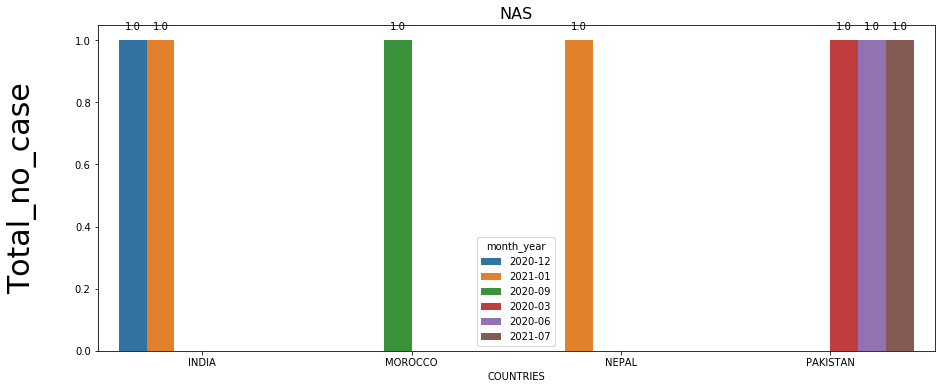

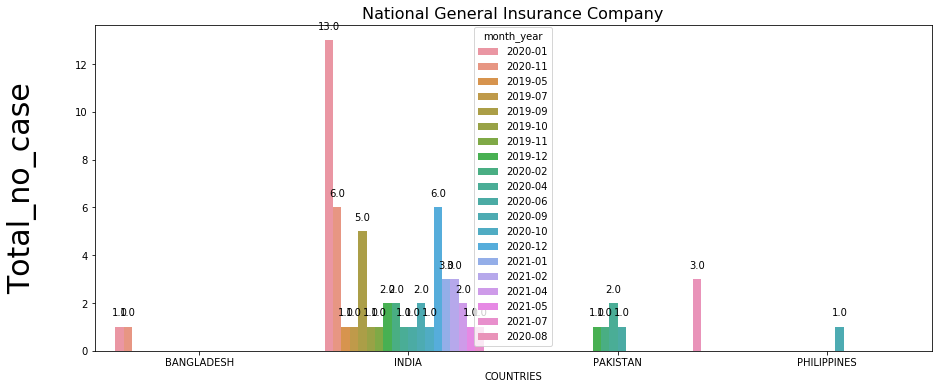

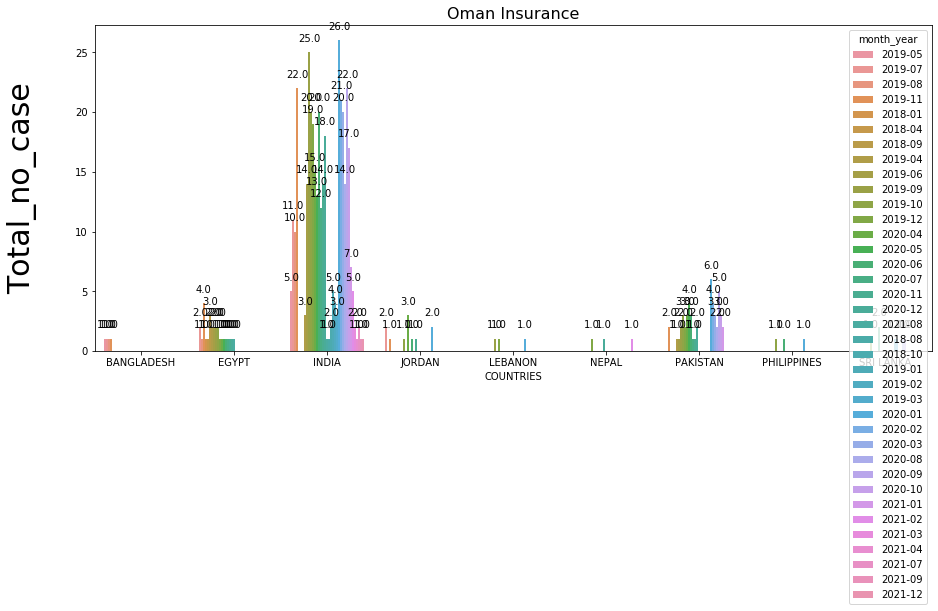

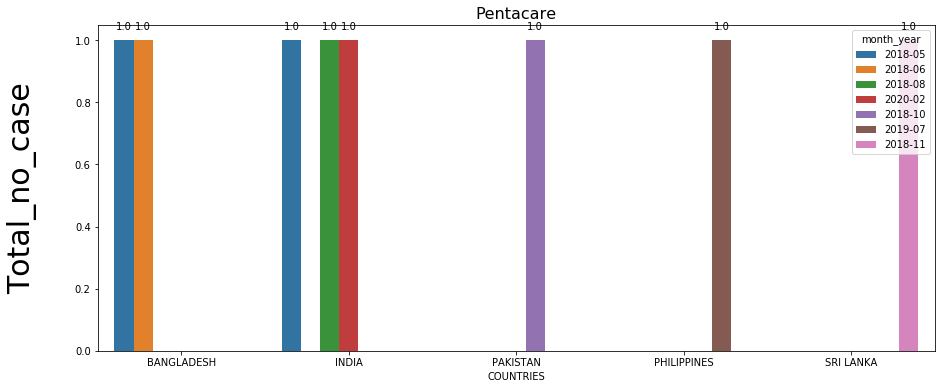

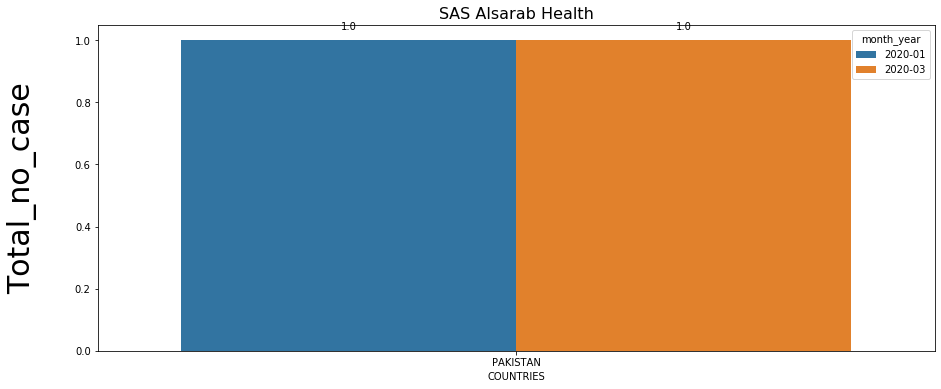

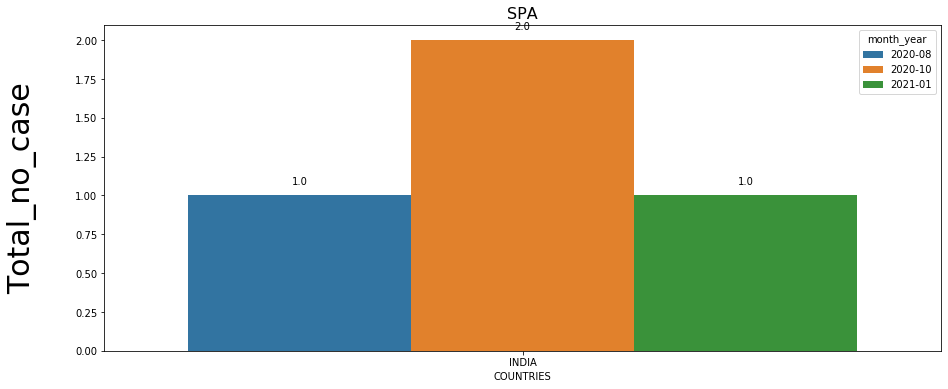

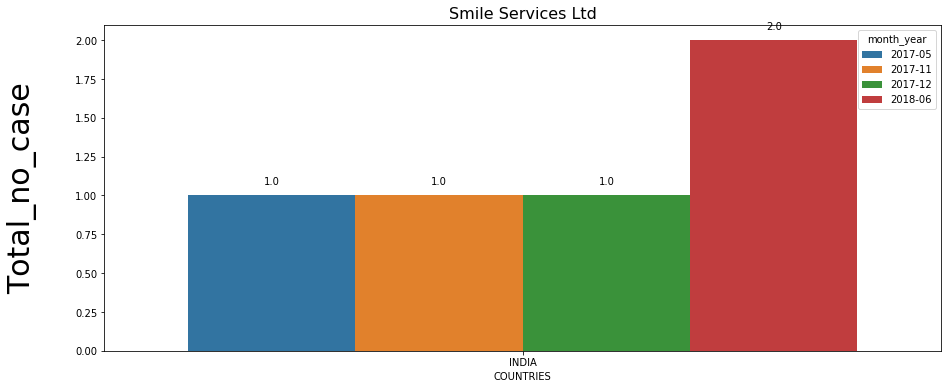

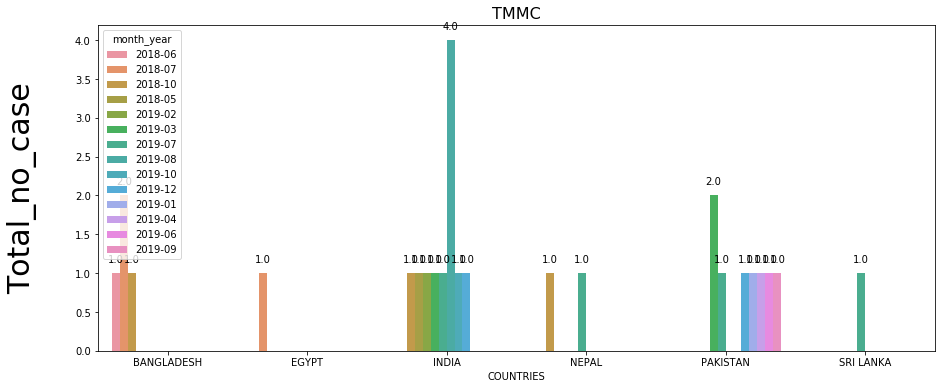

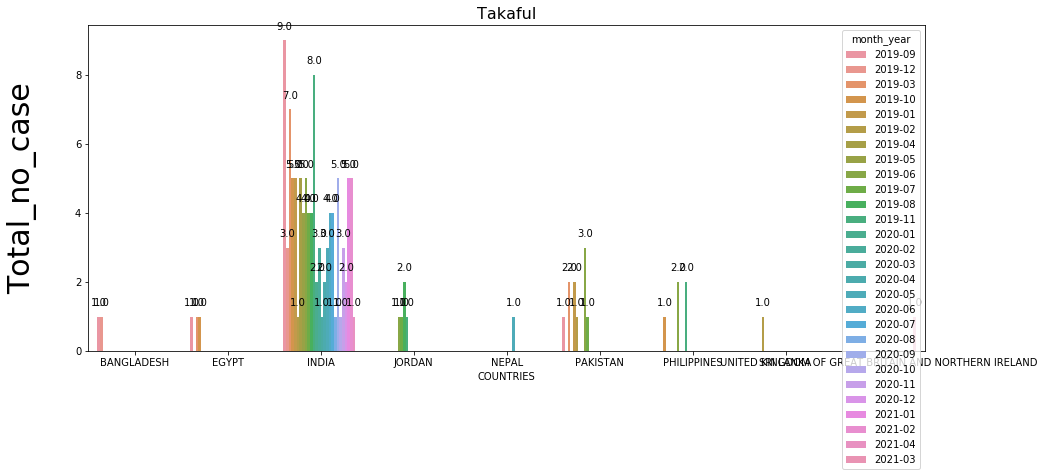

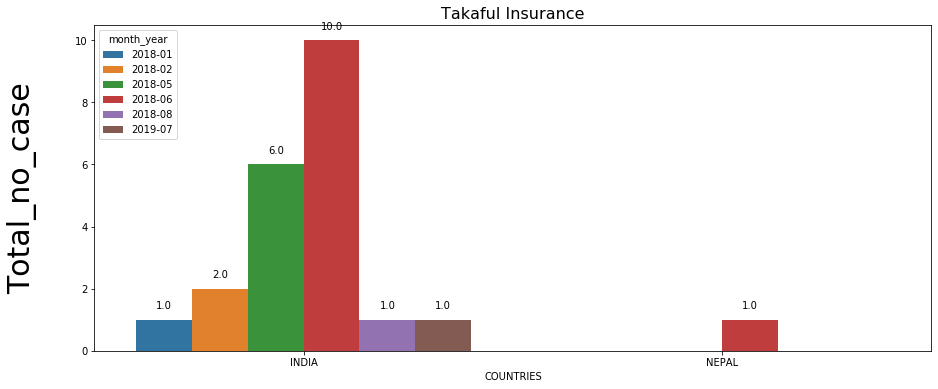

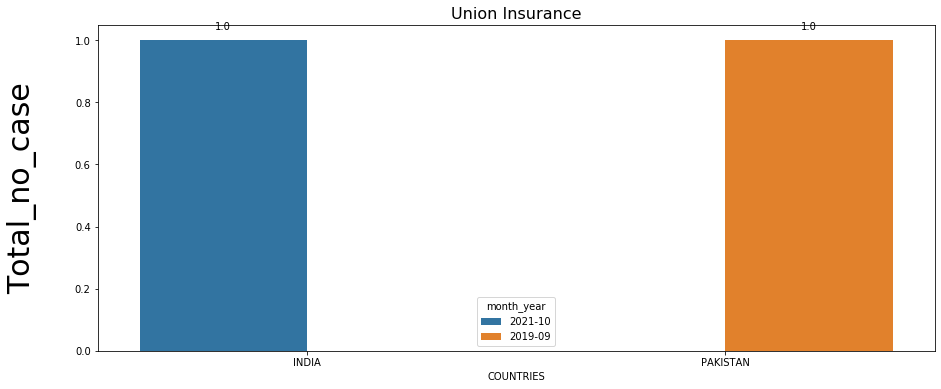

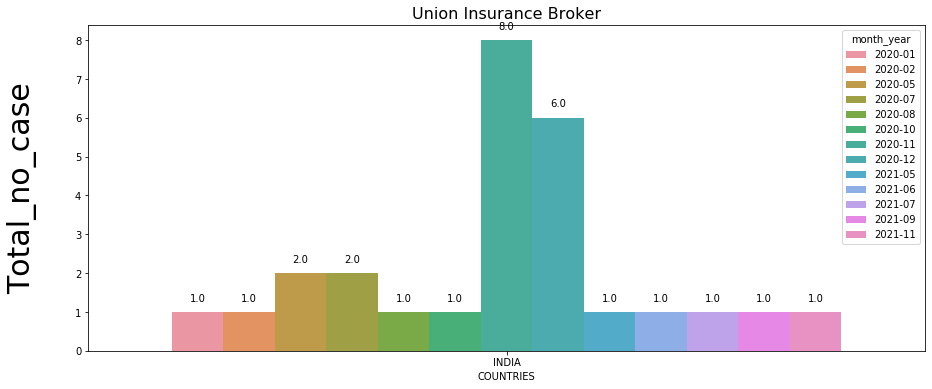

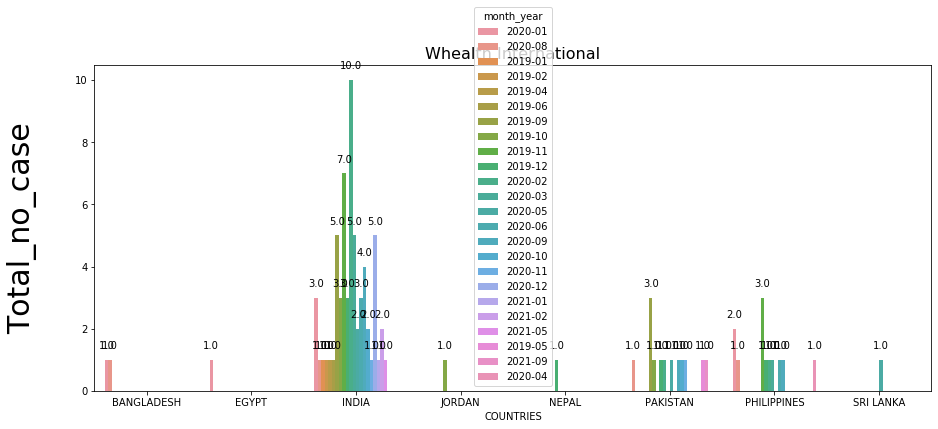

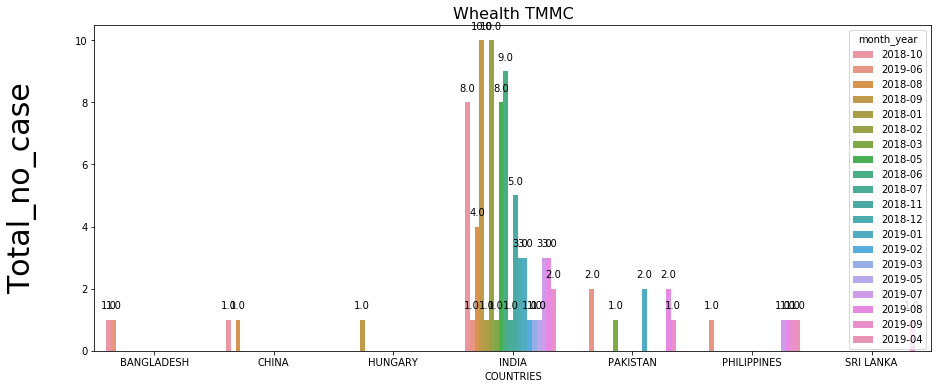

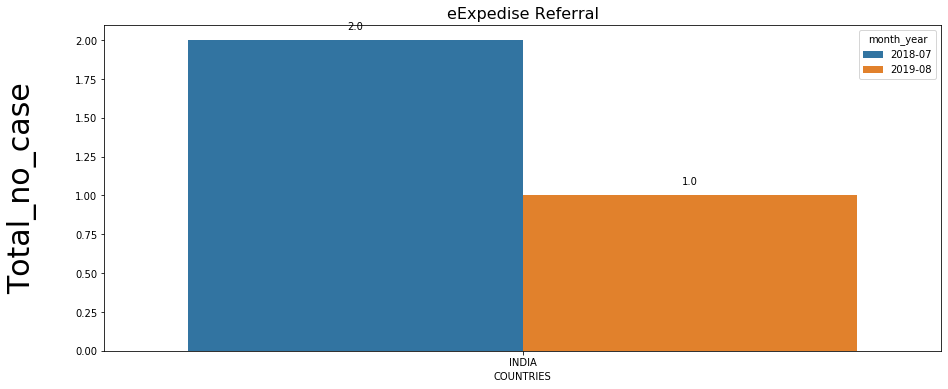

In [94]:
for i in cunt:
    temp1 = data_df[data_df['Insurer_Nm']==i]
    plt.figure(figsize=(15,6))
    ax = sns.barplot(x='Country_Name', y='count',hue='month_year', data=temp1 )
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    ax.set_xlabel('COUNTRIES',size=10)
    ax.set_ylabel('Total_no_case\n', size=30)
    plt.title(i, size=16) 
    plt.show()